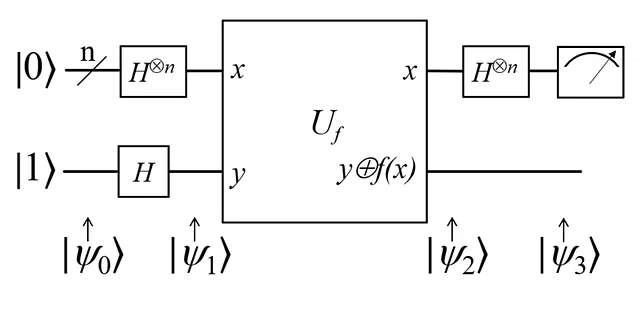

Deustch's algorithm, is also known as Deutsch-Jozsa algorithm. Given a binary function f, **assuming f is either unbalanced (constant) or balanced (returning 0 and 1 equally often),** the algorithm enables us to distinguish between the two options in a single evaluation.

The idea behind the circuit is: we input the superposition of all possible inputs (prepared with the Hadamard gate) and we receive the superposition of all possible outputs. Then we measure the output state in a special basis which lets us extract only the information if f is balanced or not without knowing the specific output values.

In [2]:
!pip install qiskit ipywidgets
!pip install qiskit qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=d557896036fbe6b8970d6bebd67b072cfcaaa6ef116e0cbd6a34a4252bcaa40c
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee

**UNBELANCED FUNCTION**

An unbalanced function means the output is always the same. In other words, if we consider the standard reversible representation of a quantum function: $f(|x, y⟩) = |x, f(x)⊕ y⟩$ we want $f(x)$ to always be 0 or always be 1. That means we have two possible cases:

`unbalanced0` : $f(|x, y⟩) = |x, f(x)⊕ y⟩ = |x, 0⊕ y⟩ = |x, y⟩$
This means our circuit for f will be simply an identity:



```
unbalanced0 = QuantumCircuit(*regs)
unbalanced0.barrier()
```



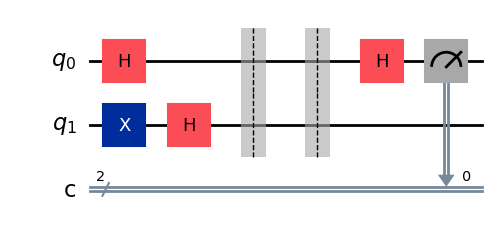

In [ ]:
import qiskit as qs
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
regs = [QuantumRegister(2, 'q'), ClassicalRegister(2, 'c')]
# state initialization: apply x on output bit, and H on all
reg1 = QuantumCircuit(*regs)
reg1.x(1)
reg1.h(0)
reg1.h(1)
reg1.barrier() # only for separation in printing
reg1.barrier()
# at the end, apply h to input bit and measure it
reg1.h(0)
reg1.measure(0, 0)
#reg1.measure(1, 1)
reg1.draw(output='mpl')

In [ ]:
print(reg1)

     ┌───┐      ░  ░ ┌───┐┌─┐
q_0: ┤ H ├──────░──░─┤ H ├┤M├
     ├───┤┌───┐ ░  ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░──░───────╫─
     └───┘└───┘ ░  ░       ║ 
c: 2/══════════════════════╩═
                           0 


{'00': 1000000}


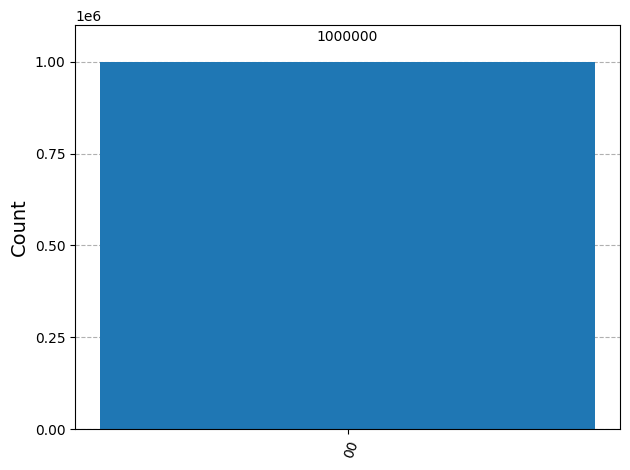

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram as hist
from qiskit.result import marginal_distribution
from numpy import pi
import numpy as np

# Hitogram of Probabilities

simulation = AerSimulator(shots=1e6).run(reg1).result()
numerical_result = simulation.get_counts()
print(numerical_result)
display(hist(numerical_result))

`unbalanced1` : $f(|x, y⟩) = |x, f(x)⊕ y⟩ = |x, 1⊕ y⟩ = |x,~y⟩$
So we always flip y regardless of x. A quantum circuit will simply apply a NOT to the y register:

```
unbalanced1 = QuantumCircuit(*regs)
unbalanced1.x(1)
unbalanced1.barrier()
```



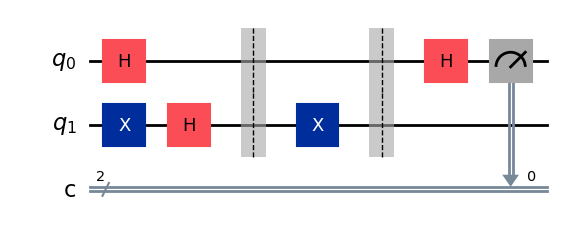

In [ ]:
import qiskit as qs
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
regs = [QuantumRegister(2, 'q'), ClassicalRegister(2, 'c')]
# state initialization: apply x on output bit, and H on all
reg2 = QuantumCircuit(*regs)
reg2.x(1)
reg2.h(0)
reg2.h(1)
reg2.barrier() # only for separation in printing
reg2.x(1)
reg2.barrier()
# at the end, apply h to input bit and measure it
reg2.h(0)
reg2.measure(0, 0)
#reg2.measure(1, 1)
reg2.draw(output='mpl')

In [ ]:
print(reg2)

     ┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘ ░       ║ 
c: 2/═══════════════════════════╩═
                                0 


{'00': 1000000}


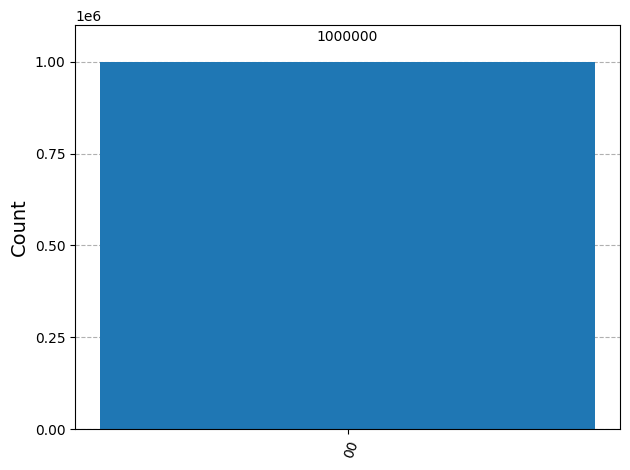

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram as hist
from qiskit.result import marginal_distribution
from numpy import pi
import numpy as np

# Hitogram of Probabilities

simulation = AerSimulator(shots=1e6).run(reg2).result()
numerical_result = simulation.get_counts()
print(numerical_result)
display(hist(numerical_result))

**BELANCED FUNCTION**
A balanced function is a tiny bit trickier: $f(x)$ actually depends on x now. Let’s consider the simplest case of $f(x)=x$ and see what it means to our $y$ register: $f(∣x, y⟩) = |x, f(x)⊕ y⟩ = |x, x⊕ y⟩$

Which is no less and no more than the well-known quantum CNOT gate. A NOT operation is applied on the second register depending on the state of the first register. If $|x⟩$ is $|1⟩$ we flip the $|y⟩$, otherwise we leave $|y⟩$ unchanged.

```
balanced = QuantumCircuit(*regs)
balanced.cx(0,1)
balanced.barrier()
```



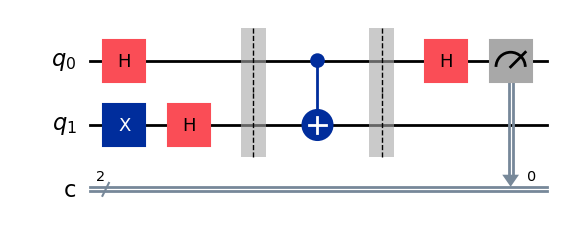

In [ ]:
import qiskit as qs
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
regs = [QuantumRegister(2, 'q'), ClassicalRegister(2, 'c')]
# state initialization: apply x on output bit, and H on all
reg3 = QuantumCircuit(*regs)
reg3.x(1)
reg3.h(0)
reg3.h(1)
reg3.barrier() # only for separation in printing
reg3.cx(0,1)
reg3.barrier()
# at the end, apply h to input bit and measure it
reg3.h(0)
reg3.measure(0, 0)
#reg3.measure(1, 1)
reg3.draw(output='mpl')

In [ ]:
print(reg3)

     ┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■───░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘ ░       ║ 
c: 2/═══════════════════════════╩═
                                0 


{'01': 1000000}


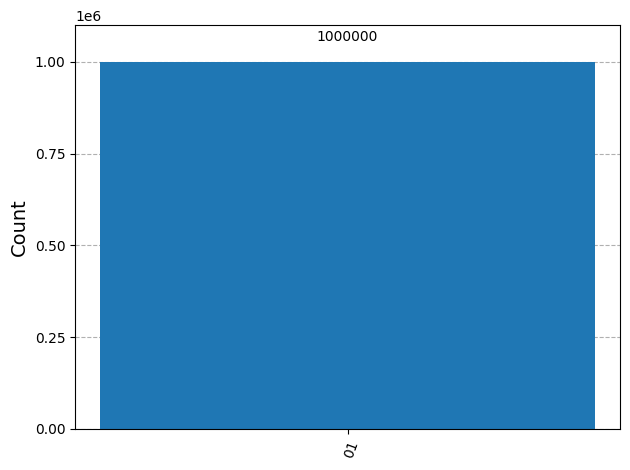

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram as hist
from qiskit.result import marginal_distribution
from numpy import pi
import numpy as np

# Hitogram of Probabilities

simulation = AerSimulator(shots=1e6).run(reg3).result()
numerical_result = simulation.get_counts()
print(numerical_result)
display(hist(numerical_result))

**Deutsch-Jozsa algorithm**

b {'1': 100000}


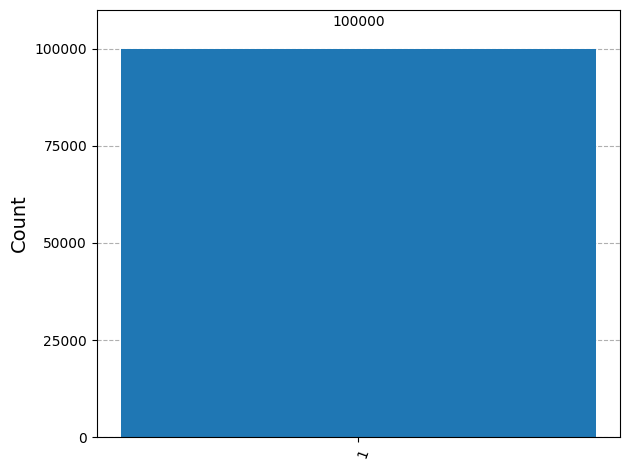

u {'0': 100000}


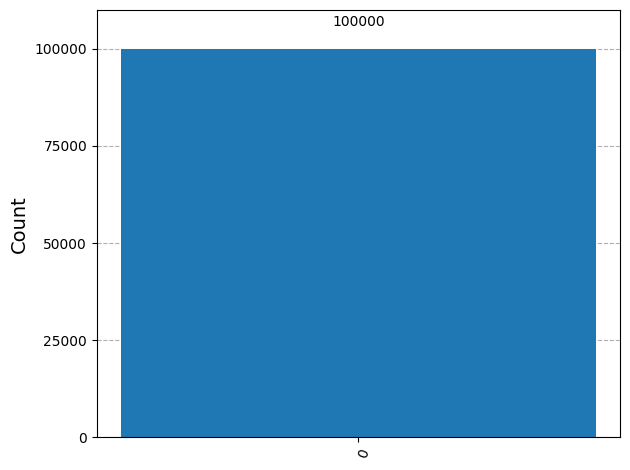

u {'0': 100000}


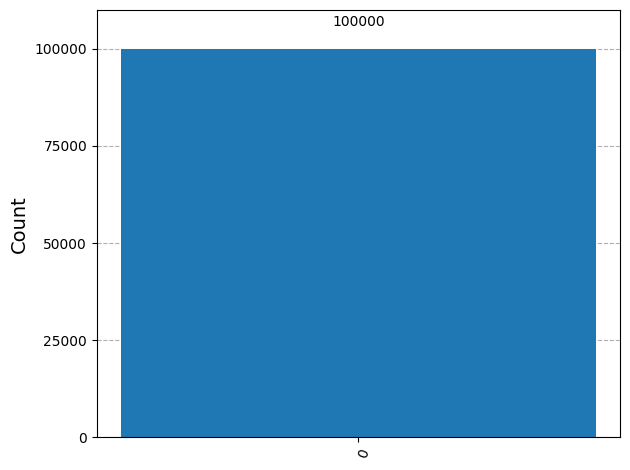

In [ ]:
import qiskit as qs
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit import transpile
regs = [QuantumRegister(2, 'q'), ClassicalRegister(1, 'c')]
# state initialization: apply x on output bit, and H on all
init = QuantumCircuit(*regs)
init.x(1)
init.h(0)
init.h(1)
init.barrier()
# balanced is a c-not - output depends on input
balanced = QuantumCircuit(*regs)
balanced.cx(0,1)
balanced.barrier()
# unbalanced0 is the unity
unbalanced0 = QuantumCircuit(*regs)
unbalanced0.barrier()
# unbalanced1 is a 'not' - output is flipped independent of input
unbalanced1 = QuantumCircuit(*regs)
unbalanced1.x(1)
unbalanced1.barrier()
# at the end, apply h to input bit and measure it
end = QuantumCircuit(*regs)
end.h(0)
end.measure(0, 0)
sim = AerSimulator()

# expected: only 1s for balanced, only 0s for unbalanced
for kind, oracle in (('b', balanced),
                     ('u', unbalanced0),
                     ('u', unbalanced1)):
    circuit = init.compose(oracle).compose(end)
    transpiled = qs.transpile(circuit)
    counts = sim.run(transpiled, shots=100000).result().get_counts()
    print(kind, counts)
    display(hist(counts))

In [ ]:
print(circuit)

     ┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘ ░       ║ 
c: 1/═══════════════════════════╩═
                                0 


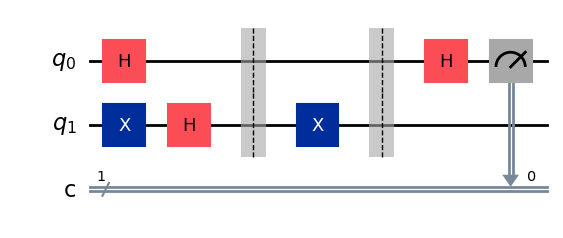

In [ ]:
circuit.draw(output='mpl')

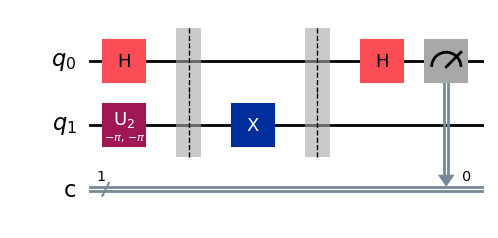

In [ ]:
from qiskit import transpile
transpiled = qs.transpile(circuit)
transpiled.draw(output='mpl')

In [3]:
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator

print('\nBit Flip Code')
print('----------------')


backend = AerSimulator() # Using local Aer simulator

q = QuantumRegister(3,'q')
c = ClassicalRegister(1,'c')

circuit = QuantumCircuit(q,c)

circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])
circuit.x(q[0]) #Add this to simulate a bit flip error
circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])
circuit.ccx(q[2],q[1],q[0])
circuit.measure(q[0],c[0])

result = backend.run(circuit,shots=1024).result()
counts = result.get_counts(circuit)
print('RESULT: ',counts) # Print result


Bit Flip Code
----------------
RESULT:  {'0': 1024}


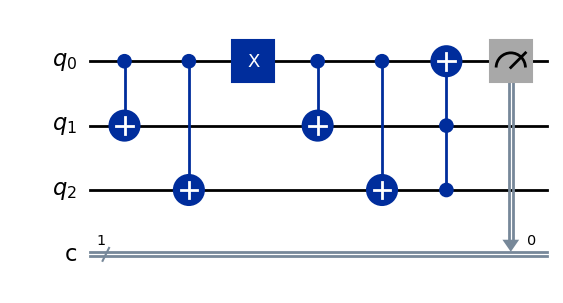

In [4]:
circuit.draw(output='mpl')